## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 

### Linear Regress

In [2]:
bost = datasets.load_boston()
print(bost.data.shape)
print(bost.target.shape)
print(bost.target[:10])

(506, 13)
(506,)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [3]:
corr = []
for i in range(bost.data.shape[1]):
    corr.append(np.corrcoef(bost.data[:,i], bost.target)[0][1])
corr  

[-0.3883046085868113,
 0.36044534245054277,
 -0.4837251600283727,
 0.17526017719029854,
 -0.42732077237328264,
 0.6953599470715395,
 -0.3769545650045963,
 0.24992873408590388,
 -0.38162623063977763,
 -0.468535933567767,
 -0.5077866855375617,
 0.33346081965706653,
 -0.7376627261740147]

In [4]:
((np.array(corr)>0.5) | (np.array(corr)<-0.5))

array([False, False, False, False, False,  True, False, False, False,
       False,  True, False,  True])

In [5]:
X = bost.data[:, np.newaxis, 5]
X.shape

(506, 1)

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, bost.target, test_size=0.1, random_state=1)

In [7]:
ln = linear_model.LinearRegression()
ln.fit(train_x, train_y)
pred = ln.predict(test_x)

In [8]:
print('Coefficients: ', ln.coef_)

print("Mean squared error: %.2f"
      % mean_squared_error(test_y, pred))

Coefficients:  [8.98089905]
Mean squared error: 38.75


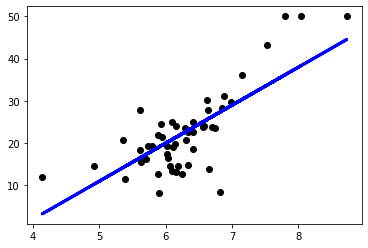

In [9]:
plt.scatter(test_x[:,0], test_y,  color='black')
plt.plot(test_x[:,0], pred, color='blue', linewidth=3)
plt.show()

### Logistics Regression

In [10]:
wine = datasets.load_wine()

In [11]:
print(wine.data.shape)
print(wine.target.shape)
wine.target

(178, 13)
(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [12]:
train_x, test_x, train_y, test_y = train_test_split(wine.data, wine.target, test_size=0.1, random_state=1)
print(test_x.shape)
print(test_y.shape)
lg = linear_model.LogisticRegression()
lg.fit(train_x, train_y)
pred = lg.predict(test_x)

(18, 13)
(18,)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
acc = accuracy_score(test_y, pred)
print("Accuracy: ", acc)

Accuracy:  0.9444444444444444
